# Day 2 - Supervised learning practical tasks
***
These tasks cover linear regression, logistic regression, decision trees, model evaluation and regularization.

## Regression models

You will use [Advertising](https://www.kaggle.com/purbar/advertising-data) Dataset. The dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio and newspaper.
#### Your task will be to:
1. Write evaluation functions (MAE, MSE, SSE, RMSE, MAPE, R2).
2. Analyze the correlation matrix.
3. Predict sales values using linear regression.
4. Evaluate model with written statistical explanatory variables.
5. Perform cross-validation (k-fold).
6. Compare your regression model to a reduced model by removing one of the features.
7. Compare your regression model to regularization models.

Please use your code and visualization results made in previous day for data preparation and explanatory analysis.

In [2]:
import pandas as pd
import numpy as np

df_adv= pd.read_csv("advertising.csv")

### 1. Create statistical evaluation functions for regression models

#### 1.1 Create a function that calculates mean absolute error (MAE)

\begin{equation}
MAE = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i\right|
\end{equation}

In [17]:
def mae(y_true, y_pred):
    return np.mean(np.abs(np.array(y_true) - np.array(y_pred)))

#### 1.2 Create a function that calculates mean squared error (MSE)

\begin{equation}
MSE = \frac{1}{n}\cdot SSE
\end{equation}

\begin{equation}
SSE = \sum_{i=1}^n(y_i - \hat{y}_i)^2
\end{equation}

In [4]:
def sse(y_true, y_pred):
    return np.sum((np.array(y_true) - np.array(y_pred)) ** 2)

def mse(y_true, y_pred):
    return sse(y_true, y_pred) / len(y_true)

#### 1.3 Create a function that calculates root mean squared error (RMSE)

\begin{equation}
RMSE = \sqrt{MSE}
\end{equation}

In [5]:
def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

#### 1.4 Create a function that calculates mean absolute percentage error (MAPE)

\begin{equation}
MAPE = \frac{100}{n} \sum_{i=1}^n \left| \frac{y_i - \hat{y}_i}{y_i} \right|
\end{equation}

In [6]:
def mape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_true_safe = np.where(y_true == 0, 1e-9, y_true)
    return (100 / len(y_true)) * np.sum(np.abs((y_true - y_pred) / y_true_safe))

#### 1.5 Create a function that calculates coefficient of determination $R^2$ using formula

\begin{equation}
R^2 = \frac{SST-SSE}{SST}
\end{equation}

\begin{equation}
SST = \sum_{i=1}^n (y_i - \bar{y})^2
\end{equation}


In [7]:
def r2_score_formula(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    sst = np.sum((y_true - np.mean(y_true)) ** 2)
    return (sst - sse(y_true, y_pred)) / sst

### 2 Use Linear regression model to make predictions and evaluate it with above developed functions. Perform k-fold cross-validation.

#### 2.1 Read and prepare dataset for modelling - split the data in target variable and features.

In [9]:
x = df_adv[["TV", "Radio", "Newspaper"]]
y = df_adv["Sales"]

#### 2.2. Look at the correlation and visualize the data by methods from day 1 by plots of your choice. Write what you observe.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#Correlation matrix
corr_adv = df_adv.corr()

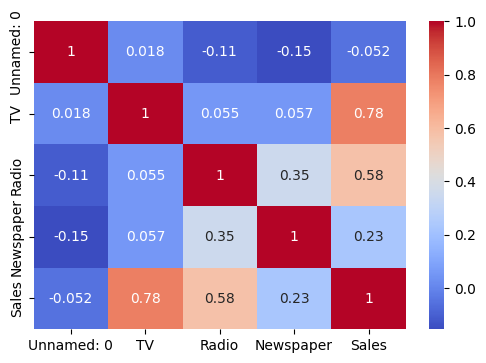

In [ ]:
#Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_adv, annot=True, cmap="coolwarm")
plt.show()

#### 2.3 Separate the target feature, split data in 2:1 proportion (33% form a holdout set, use random_state=17), and preprocess data with [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=17
)

# Scale data
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(X_train)
x_test_sc = scaler.transform(X_test)

#### 2.4 Fit linear regression model, generate predictions and print regression coefficients $b_0$ and $b_1$.

In [48]:
from sklearn.linear_model import LinearRegression

# Train model
lin_reg = LinearRegression()
lin_reg.fit(X_train_sc, y_train)

# Predictions
y_pred = lin_reg.predict(X_test_sc)

print(lin_reg.intercept_)
print(lin_reg.coef_)


14.022388059701495
[ 3.9675339   2.88155345 -0.07344038]


#### 2.5 Evaluate created model with above functions

In [18]:
mae(y_test, y_pred)
mse(y_test, y_pred)
rmse(y_test, y_pred)
mape(y_test, y_pred)
r2_score_formula(y_test, y_pred)

np.float64(0.8515370160992793)

#### 2.6 Perform k-fold cross-validation $(k=10)$ and print the mean accuracy to get an overall performance metric.

Please use [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
with [r2](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules) score.

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

scores = cross_val_score(pipe, x, y, cv=10, scoring="r2")
print(scores.mean())

0.8853562237979616


#### 2.7. Drop one of the three variables (TV, Radio or Newspaper) and create another model, evaluate it and compare to the first model.

In [23]:
x_reduced = df_adv[["TV", "Radio"]]

xr_train, xr_test, yr_train, yr_test = train_test_split(
    x_reduced, y, test_size=0.33, random_state=17
)

scaler_r = StandardScaler()
xr_train_sc = scaler_r.fit_transform(xr_train)
xr_test_sc = scaler_r.transform(xr_test)

lin_reg_r = LinearRegression()
lin_reg_r.fit(xr_train_sc, yr_train)

yr_pred = lin_reg_r.predict(xr_test_sc)

# Compare MSE
mse(y_test, y_pred)
mse(yr_test, yr_pred)

np.float64(3.458740998763223)

### 3. Use regularization models with regularization strength `alpha=1` and compare $MSE$ values with previous models.

#### 3.1 Lasso regression

In [24]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

alpha = 1

lasso = Lasso(alpha=alpha)
lasso.fit(x_train_sc, y_train)
y_lasso = lasso.predict(x_test_sc)

#### 3.2 Ridge regression

In [25]:
ridge = Ridge(alpha=alpha)
ridge.fit(x_train_sc, y_train)
y_ridge = ridge.predict(x_test_sc)

#### 3.3 Elastic net regression

Use any `l1_ratio` of your choice.


In [27]:
elastic = ElasticNet(alpha=alpha)
elastic.fit(x_train_sc, y_train)
y_elastic = elastic.predict(x_test_sc)

mse(y_test, y_pred)    
mse(y_test, y_lasso)
mse(y_test, y_ridge)
mse(y_test, y_elastic)

np.float64(6.8438833201041085)

#### 3.4 Make conclusions

## Classification models

You will use [Diabetes](https://www.kaggle.com/uciml/pima-indians-diabetes-database) dataset. The dataset includes data from 768 women with several medical predictor variables and one target variable. The classification goal is to predict whether or not the patients in the dataset have diabetes or not.
#### Your task will be to:
1. Write evaluation functions (Accuracy, Precision, Recall, F1).
2. Predict whether or not a patient has diabetes using Logistic regression and Decision Tree Classification models
3. Evaluate both models with written statistical explanatory variables
4. Draw ROC curve and compute AUC
5. Perform cross-validation (k-fold)
6. Analyze the results

Please use your code and visualization results made in previous day for data preparation and explanatory analysis.

### 1. Write statistical evaluation functions for classification models

#### 1.1 Create a function that calculates accuracy

\begin{equation}
Accuracy = \frac{True Positive + True Negative}{True Positive + True Negative + False Positive + False Negative}
\end{equation}

In [28]:
def accuracy(y_true, y_pred):
    return np.mean(np.array(y_true) == np.array(y_pred))

#### 1.2 Create a function that calculates precision

\begin{equation}
Precision = \frac{True Positive}{True Positive + False Positive}
\end{equation}

In [29]:
def precision(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp + 1e-9)

#### 1.3  Create a function that calculates recall

\begin{equation}
Recall = \frac{True Positive}{True Positive + False Negative}
\end{equation}

In [30]:
def recall(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn + 1e-9)

#### 1.4 Create a function that calculates $F1$ - score

\begin{equation}
F1 = 2\cdot \frac{Precision \cdot Recall}{Precision + Recall}
\end{equation}

In [31]:
def f1_score_custom(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * (p * r) / (p + r + 1e-9)

### 2. Use logistic regression to make prediction and evaluate it with above developed functions. Compute ROC and compute AUC. Perform k-fold cross-validation.

#### 2.1 Read and prepare dataset for modelling. Split the data in target variable and features.

Prepare dataset to use it for modelling (you should also replace 0 values in columns `Glucose`, `BloodPressure`,`SkinThickness`,`Insulin`,`BMI` with mean values).

In [33]:
df_dia= pd.read_csv("diabetes.csv")

xc = df_dia.drop(columns=["Outcome"])
yc = df_dia["Outcome"]

#### 2.2. Look at the correlation and visualize the data by methods from day 1 by plots of your choice. Write what you observe.

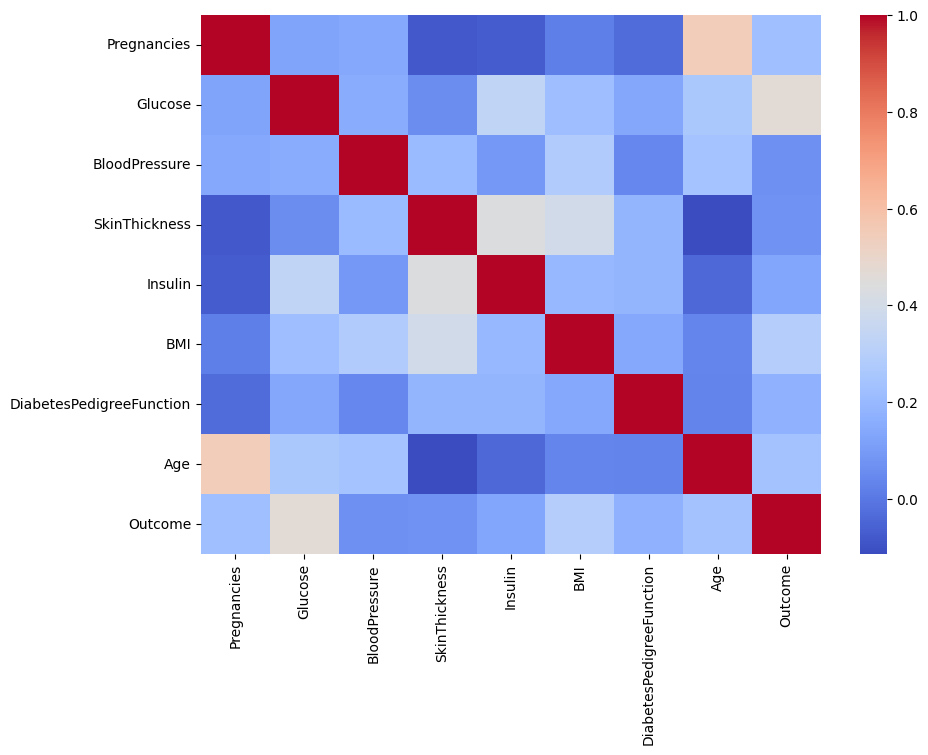

In [34]:
corr_dia = df_dia.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr_dia, cmap="coolwarm")
plt.show()

#### 2.3 Separate the target feature, split data in 2:1 proportion (33% form a holdout set, use random_state=17), and preprocess data with [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [35]:
xc_train, xc_test, yc_train, yc_test = train_test_split(
    xc, yc, test_size=0.33, random_state=17
)

scaler_c = StandardScaler()
xc_train_sc = scaler_c.fit_transform(xc_train)
xc_test_sc = scaler_c.transform(xc_test)

#### 2.4 Fit logistic regression model, generate predictions

In [36]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(xc_train_sc, yc_train)

yc_pred = log_reg.predict(xc_test_sc)

#### 2.5 Create a confusion matrix and evaluate created model with above functions

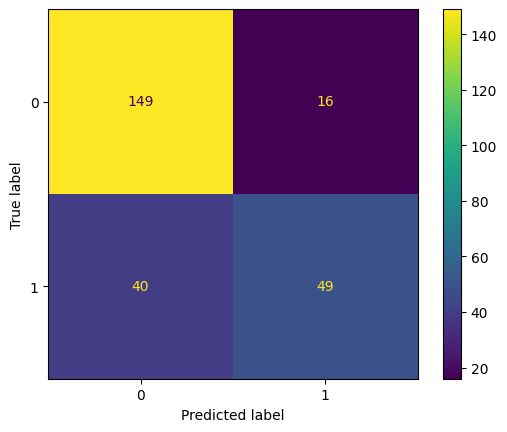

np.float64(0.6363636358675155)

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(yc_test, yc_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

accuracy(yc_test, yc_pred)
precision(yc_test, yc_pred)
recall(yc_test, yc_pred)
f1_score_custom(yc_test, yc_pred)

#### 2.6 Draw a ROC curve and compute Area Under the Curve (AUC)

You can use [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) and [from_estimator](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_predictions).
Check documentation for examples.
For roc_auc_score use predicted probabilities (`predict_proba`), not predicted values. This will align your AUC and ROC curve values.

`predict_proba()` method returns a two-dimensional array. For each instance the predicted class is the class with the maximum probability. So one simple way to get the estimated probabilities for the predicted classes is to use `np.max()`

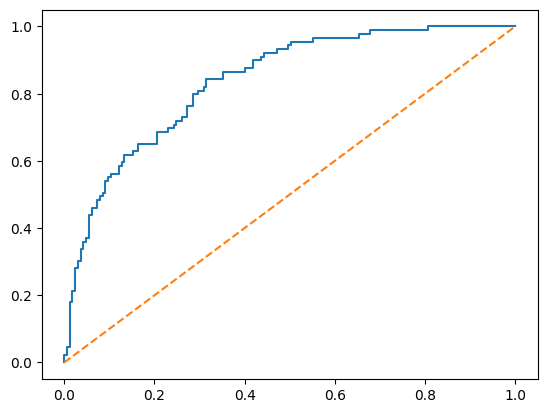

0.8371127000340484

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score

yc_prob = log_reg.predict_proba(xc_test_sc)[:,1]

fpr, tpr, _ = roc_curve(yc_test, yc_prob)
auc_value = roc_auc_score(yc_test, yc_prob)

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],"--")
plt.show()

auc_value

#### 2.7 Perform k-fold cross-validation $(k=10)$ and print the mean accuracy to get an overall performance metric.

Use [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
with [accuracy](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules). Feed you scaled X train and y train data.

In [ ]:
pipe_log = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000))
])

cv_acc = cross_val_score(pipe_log, xc, yc, cv=10, scoring="accuracy")
print(cv_acc.mean())

0.7721804511278195


### 3. Use Decision tree classification model to make predictions and evaluate it with above developed functions. Draw ROC curve and compute AUC. Perform k-fold cross-validation.

#### 3.1 Create classification tree object, fit model and generate predictions

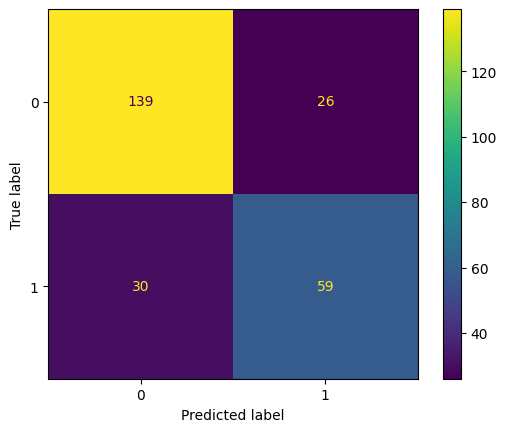

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

tree = DecisionTreeClassifier(random_state=17)
tree.fit(xc_train, yc_train)

yc_pred_tree = tree.predict(xc_test)

cm_tree = confusion_matrix(yc_test, yc_pred_tree)
ConfusionMatrixDisplay(confusion_matrix=cm_tree).plot()
plt.show()

#### 3.2 Evaluate created model with above functions

In [41]:
accuracy(yc_test, yc_pred_tree)
precision(yc_test, yc_pred_tree)
recall(yc_test, yc_pred_tree)
f1_score_custom(yc_test, yc_pred_tree)

np.float64(0.6781609190326991)

#### 3.3 Draw a ROC curve and compute Area Under the Curve (AUC)

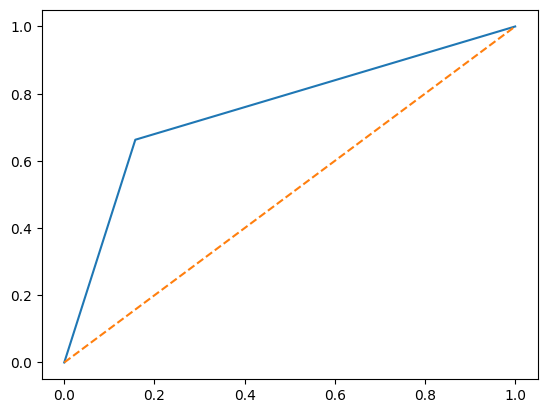

0.7526727953694246

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score

yc_prob_tree = tree.predict_proba(xc_test)[:, 1]

fpr_tree, tpr_tree, _ = roc_curve(yc_test, yc_prob_tree)
auc_tree = roc_auc_score(yc_test, yc_prob_tree)

plt.plot(fpr_tree, tpr_tree)
plt.plot([0, 1], [0, 1], "--")
plt.show()

auc_tree

#### 3.4 Perform k-fold cross-validation $(k=10)$ and print the mean accuracy to get an overall performance metric.

In [46]:
from sklearn.model_selection import cross_val_score

cv_tree = cross_val_score(tree, xc, yc, cv=10, scoring="accuracy")
print(cv_tree.mean())

0.7148496240601504


#### 3.5 Make conclusions

Compare desition tree result with logistic regerestion results